### In this notebook we will open the top1% of the genes prioritized by the algorithm and we will visualize it in a network 

In [2]:
import pandas as pd
import sys 
sys.path.insert(1, '../../scripts/')
import wrappers as wr
from graphs import labelling_without_overlapping
import matplotlib.pyplot as plt
import networkx as nx


In [3]:
Interactome=pd.read_csv('hippie_interactome.sif',sep=' ',names=['source','score','target'])
Guild_Out=pd.read_csv('Guild_Outputs/output_NetScore',sep='\t',names=['entrez','score'])
Nodes=pd.read_csv('nodes.sif',sep=' ',names=['entrez','score'])
Seeds=Nodes[Nodes.score==1]

## Keep the Onepercent of the Guild output

In [4]:
Guild_Out_top=Guild_Out.iloc[-int(Guild_Out.shape[0]*0.01):]

In [5]:
Guild_Out_top

,entrez,score
15599,666,0.075828
15600,219743,0.075834
15601,401115,0.076732
15602,353134,0.076775
15603,51554,0.077195
...,...,...
15751,6352,0.862419
15752,90865,0.905709
15753,6356,0.917375
15754,1232,0.996786


In [6]:
Interactome_graph=nx.from_pandas_edgelist(Interactome)

In [7]:
print(Interactome_graph.number_of_edges(),Interactome_graph.number_of_nodes())

199671 15756


In [8]:
Subgraph=Interactome_graph.subgraph(Guild_Out_top.entrez.tolist())

In [9]:
print(Subgraph.number_of_edges(),Subgraph.number_of_nodes())

149 157


### Start to add data to subgraph nodes in order to be displayed

#### Now by iterating through the nodes of our subgraph we will add attributes to them in order to store information useful for the visualization 

In [10]:
for node in Subgraph.nodes(data=True): 
    node[1]['label']=wr.gene_mapping(node[0],'entrez','symbol') # Save the Gene name that we will use for the label
    if node[0] in Seeds.entrez.tolist():#if the protein was a seed or not
        node[1]['seed'] = '+'
    else:                     
        node[1]['seed']= '-'

In [11]:
Subgraph.nodes(data=True)

NodeDataView({285704: {'label': 'RGMB', 'seed': '-'}, 3596: {'label': 'IL13', 'seed': '+'}, 1041: {'label': 'CDSN', 'seed': '+'}, 2068: {'label': 'ERCC2', 'seed': '+'}, 51738: {'label': 'GHRL', 'seed': '-'}, 1232: {'label': 'CCR3', 'seed': '+'}, 1080: {'label': 'CFTR', 'seed': '+'}, 5184: {'label': 'PEPD', 'seed': '+'}, 255043: {'label': 'TMEM86B', 'seed': '-'}, 582: {'label': 'BBS1', 'seed': '+'}, 583: {'label': 'BBS2', 'seed': '-'}, 5192: {'label': 'PEX10', 'seed': '-'}, 5193: {'label': 'PEX12', 'seed': '-'}, 1610: {'label': 'DAO', 'seed': '-'}, 585: {'label': 'BBS4', 'seed': '+'}, 5196: {'label': 'PF4', 'seed': '-'}, 203859: {'label': 'ANO5', 'seed': '-'}, 596: {'label': 'BCL2', 'seed': '+'}, 219743: {'label': 'TYSND1', 'seed': '-'}, 6754: {'label': 'SSTR4', 'seed': '-'}, 6755: {'label': 'SSTR5', 'seed': '-'}, 10850: {'label': 'CCL27', 'seed': '-'}, 5732: {'label': 'PTGER2', 'seed': '+'}, 100: {'label': 'ADA', 'seed': '+'}, 27241: {'label': 'BBS9', 'seed': '-'}, 8811: {'label': 'GAL

### Now we need to assign positions to the Nodes in the space in order to Visualize them we will use layouts already implemented in the networkx library 

In [12]:
pos_=nx.layout.spring_layout(Subgraph,k=0.2)
pos_

{285704: array([-0.8156069 ,  0.53277877]),
 3596: array([-0.4775671 ,  0.79012834]),
 1041: array([0.89584278, 0.02254015]),
 2068: array([0.85020139, 0.42523382]),
 51738: array([0.20770055, 0.09051277]),
 1232: array([-0.6088744 ,  0.22507464]),
 1080: array([-0.03665595, -0.38914307]),
 5184: array([0.95785633, 0.15092381]),
 255043: array([ 0.30179201, -0.76799494]),
 582: array([-0.52810164, -0.58725152]),
 583: array([-0.57725801, -0.55430954]),
 5192: array([0.07846014, 0.5663156 ]),
 5193: array([0.12010847, 0.51813917]),
 1610: array([0.41239968, 0.81218432]),
 585: array([-0.54369243, -0.56461179]),
 5196: array([-0.39096312,  0.17443084]),
 203859: array([-0.20865714,  0.33420487]),
 596: array([ 0.53809554, -0.45275904]),
 219743: array([0.17709835, 0.7290147 ]),
 6754: array([0.39909762, 0.39711565]),
 6755: array([0.29541024, 0.52275862]),
 10850: array([-0.21449177,  0.39701676]),
 5732: array([ 0.36526122, -0.90113852]),
 100: array([0.98680229, 0.02191799]),
 27241: a

In [13]:
pos_[6754]

array([0.39909762, 0.39711565])

#### Here we will substitute the nodes with their positions in order to place the edges in the correct positions

In [14]:
edges_coordinates=[(pos_[x],pos_[y]) for (x,y) in Subgraph.edges]
edges_coordinates

[(array([0.20770055, 0.09051277]), array([ 0.31808948, -0.01552272])),
 (array([0.20770055, 0.09051277]), array([0.03967452, 0.13705601])),
 (array([-0.6088744 ,  0.22507464]), array([-0.80499737,  0.2239881 ])),
 (array([-0.6088744 ,  0.22507464]), array([-0.71358492,  0.28616378])),
 (array([-0.6088744 ,  0.22507464]), array([-0.50181149,  0.24276646])),
 (array([-0.6088744 ,  0.22507464]), array([-0.44954708,  0.25820928])),
 (array([-0.6088744 ,  0.22507464]), array([-0.49484595,  0.32478433])),
 (array([-0.6088744 ,  0.22507464]), array([-0.51913902,  0.04851566])),
 (array([-0.03665595, -0.38914307]), array([-0.15082993, -0.11665083])),
 (array([-0.03665595, -0.38914307]), array([-0.02672904, -0.53658693])),
 (array([-0.03665595, -0.38914307]), array([ 0.30476173, -0.48735655])),
 (array([-0.03665595, -0.38914307]), array([-0.0473082 , -0.30286672])),
 (array([-0.03665595, -0.38914307]), array([-0.08095129, -0.5532138 ])),
 (array([-0.03665595, -0.38914307]), array([-0.18533367, 

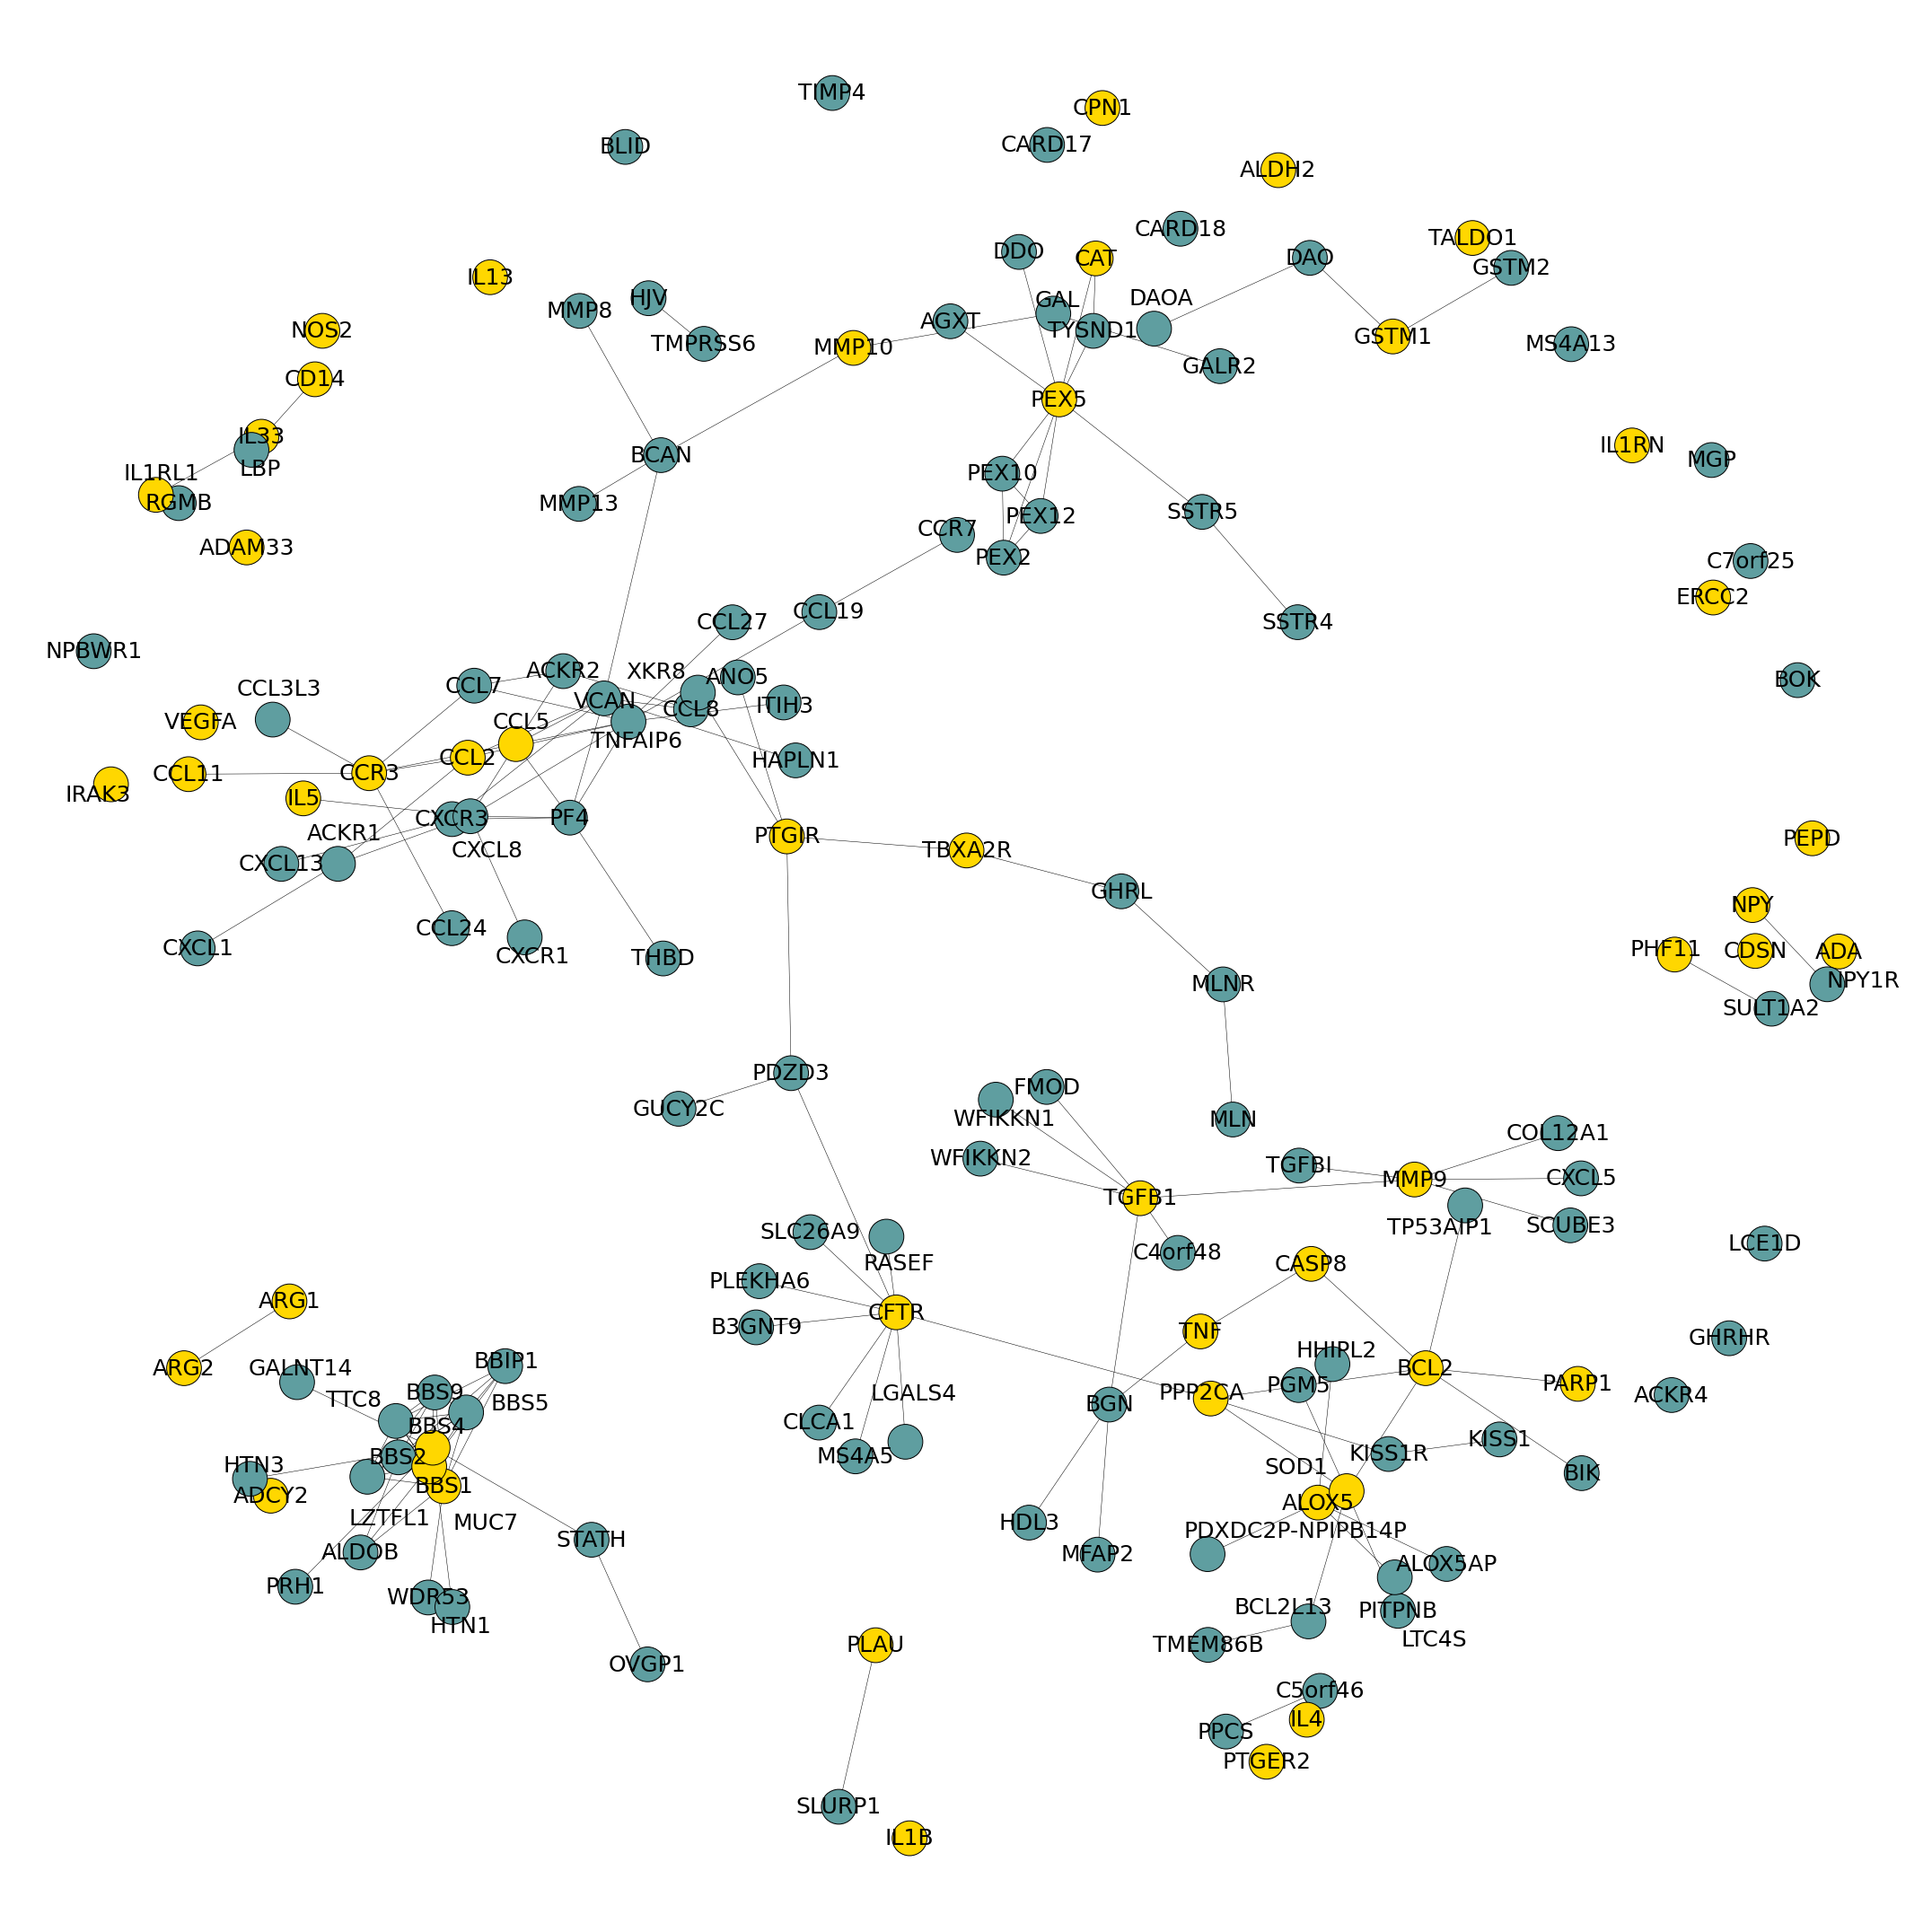

In [21]:
#Create the figure
fig,ax=plt.subplots(figsize=(30,30))                    


for point in edges_coordinates:
    ax.plot((point[0][0],point[1][0]),(point[0][1],point[1][1]),
            color='black',linewidth=0.5,zorder=0)


xses_list=[x[0] for x in pos_.values()]
yses_list=[y[1] for y in pos_.values()]
colors=['gold' if node[1]['seed']=='+' else 'cadetblue' for node in Subgraph.nodes(data=True)]
labels=[node[1]['label'] for node in Subgraph.nodes(data=True)]

ax.scatter(xses_list,
           yses_list, 
           facecolors=colors,
           s=1500,
           alpha=1,
          edgecolors='black',
          zorder=1)


# # for i in range(len(labels)):
# #     ax.annotate(labels[i],(xses_list[i],yses_list[i]),fontsize=25)

labelling_without_overlapping(xses_list,
           yses_list,labels,ax,fontsize=25,ha='center',va='center')


ax.axis('off')
plt.tight_layout()
plt.show()

### Use Layout from igraph

In [75]:
import igraph as ig

In [76]:
Subgraph_ig=ig.Graph.from_networkx(Subgraph)
ig_layout=Subgraph_ig.layout_auto()
pos_=dict(list(zip(Subgraph.nodes(),ig_layout.coords)))